# 🧾 Table of Contents

- [1. 📊 Data Visualization](#-data-visualization)
- [2. 📥 Data Loading](#-data-loading)
- [3. 🔍 Data Exploration](#-data-exploration)
- [4. ⚙️ Data Preprocessing](#-data-preprocessing)
- [5. 🔁 Cross-Validation](#-cross-validation)
- [6. 🧠 Model Training](#-model-training)
- [7. 📈 Model Evaluation](#-model-evaluation)

 # Importing all the necessary Libraries

## 1. 📊 Data Visualization

In [1]:
# This cell performs a key step: 📊 Data Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,confusion_matrix, roc_curve, precision_recall_curve, auc,precision_score, recall_score

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


#Loading the Data

## 2. 📥 Data Loading

In [2]:
# This cell performs a key step: 📥 Data Loading
data = pd.read_csv("creditcard.csv")

#Understanding the Data

## 3. 🔍 Data Exploration

In [3]:
# This cell performs a key step: 🔍 Data Exploration
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Describing the Data

In [4]:
# This cell performs a key step: 🔍 Data Exploration
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

#Imbalance in the data

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


## 4. ⚙️ Data Preprocessing

In [6]:
# This cell performs a key step: ⚙️ Data Preprocessing
data.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
# This cell performs a key step: 🔍 Data Exploration
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
# This cell performs a key step: 🔍 Data Exploration
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#Print the amount details for Fraudulent Transaction

# Print the amount details for Normal Transaction

#Plotting the Correlation Matrix

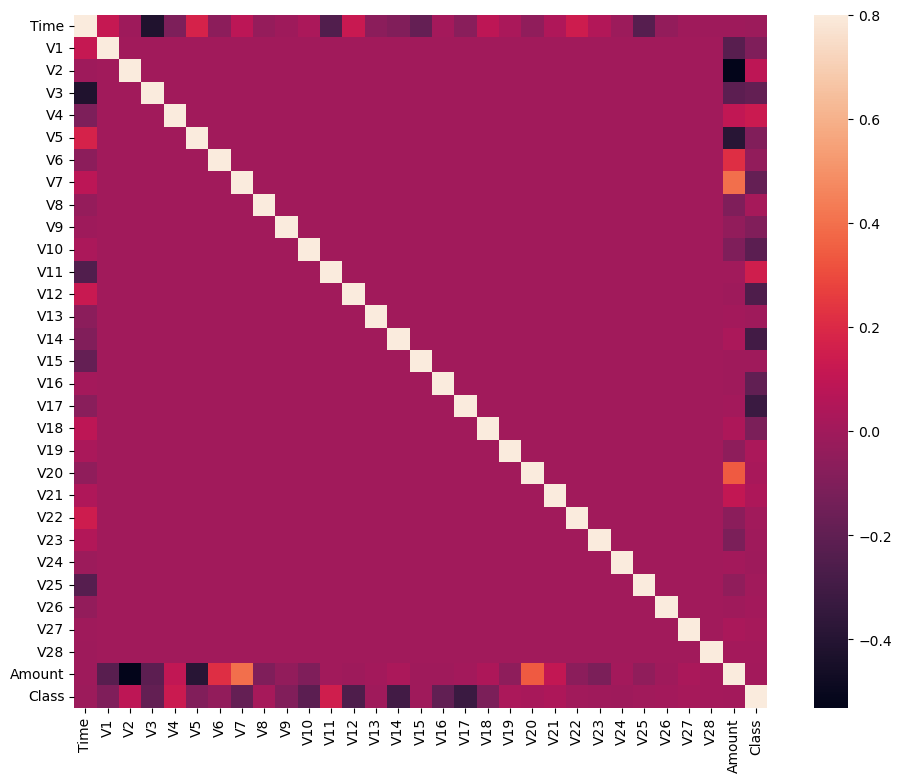

In [9]:
# This cell performs a key step: 📊 Data Visualization
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#Separating the X and the Y values

In [10]:
# This cell performs a key step: 🔍 Data Exploration
x = data.drop('Class', axis=1) 
y = data["Class"]
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [11]:
# This cell performs a key step: ⚙️ Data Preprocessing
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=42, stratify=y)

x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=0.50, random_state=42, stratify=y_)

#Training and Testing Data Bifurcation

#Building a Random Forest Model using scikit learn

## 5. 🔁 Cross-Validation

In [12]:
# This cell performs a key step: 🔁 Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## 6. 🧠 Model Training

In [14]:
# This cell performs a key step: 🧠 Model Training
accuracies =[]
f1s =[]
roc_aucs =[]
pric_sco =[]
recall_sco=[]
for train_index, val_index in skf.split(x, y):
    x_cv_train, x_cv_val = x.iloc[train_index], x.iloc[val_index]
    y_cv_train, y_cv_val = y.iloc[train_index], y.iloc[val_index]
    model = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')
    model.fit(x_cv_train, y_cv_train)
    y_cv_val_pred = model.predict(x_cv_val)
    accuracies.append(accuracy_score(y_cv_val, y_cv_val_pred))
    f1s.append(f1_score(y_cv_val, y_cv_val_pred))
    roc_aucs.append(roc_auc_score(y_cv_val, y_cv_val_pred))
    pric_sco.append(precision_score(y_cv_val, y_cv_val_pred))
    recall_sco.append(recall_score(y_cv_val, y_cv_val_pred))

## 7. 📈 Model Evaluation

In [15]:
# This cell performs a key step: 📈 Model Evaluation
print(f"List of CV Accuracy: {accuracies}")
print(f"List of CV F1 Score: {f1s}")
print(f"List of CV ROC AUC: {roc_aucs}")  
print(f"List of CV precision_score: {pric_sco}")
print(f"List of CV recall_score: {recall_sco}")  
    
    

print(f"Avarage of CV Accuracy: {np.mean(accuracies):.4f}")
print(f"Avarage of CV F1 Score: {np.mean(f1s):.4f}")
print(f"Avarage of CV ROC AUC: {np.mean(roc_aucs):.4f}")
print(f"Avarage of CV precision_score: {np.mean(pric_sco):.4f}")
print(f"Avarage of CV recall_score: {np.mean(recall_sco):.4f}")

List of CV Accuracy: [0.9994557775359011, 0.9996137776061234, 0.9996137708256526, 0.9995084355962852, 0.999490879724724]
List of CV F1 Score: [0.824858757062147, 0.8750000000000001, 0.8764044943820225, 0.839080459770115, 0.839779005524862]
List of CV ROC AUC: [0.8686429033667133, 0.8888888888888888, 0.8979415975454071, 0.8724226003997435, 0.8876935505925987]
List of CV precision_score: [0.9358974358974359, 1.0, 0.975, 0.9605263157894737, 0.9156626506024096]
List of CV recall_score: [0.7373737373737373, 0.7777777777777778, 0.7959183673469388, 0.7448979591836735, 0.7755102040816326]
Avarage of CV Accuracy: 0.9995
Avarage of CV F1 Score: 0.8510
Avarage of CV ROC AUC: 0.8831
Avarage of CV precision_score: 0.9574
Avarage of CV recall_score: 0.7663


In [12]:
# This cell performs a key step: 🧠 Model Training
train_sizes = np.linspace(0.05, 1.0, 10)  
train_errors = []
cv_errors = []
model = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')

for size in train_sizes:
    train_size = int(size * len(x_train))
    x_train_subset = x_train.iloc[:train_size] 
    y_train_subset = y_train.iloc[:train_size]
    
    model.fit(x_train_subset, y_train_subset)

    y_train_pred = model.predict(x_train_subset)
    train_error = 1 - accuracy_score(y_train_subset, y_train_pred)


    y_val_pred = model.predict(x_val)
    cv_error = 1 - accuracy_score(y_val, y_val_pred)

    train_errors.append(train_error)
    cv_errors.append(cv_error)



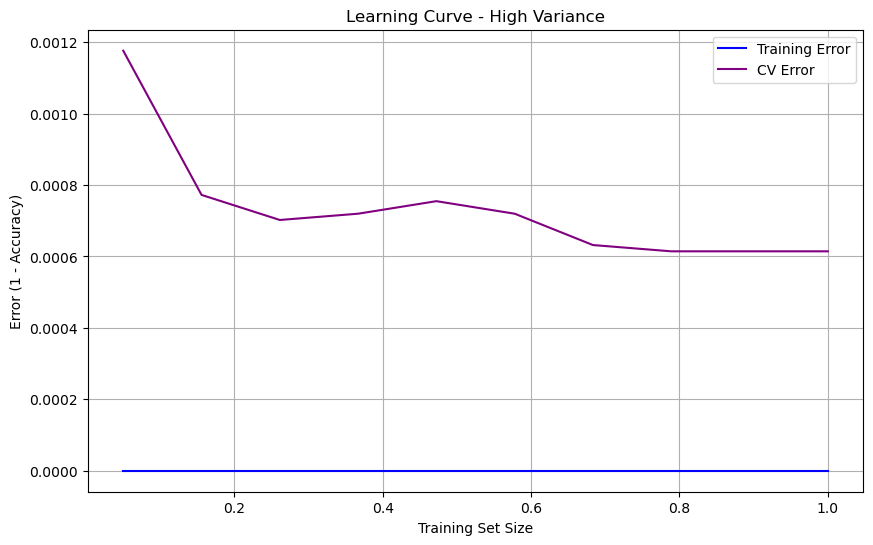

In [13]:
# This cell performs a key step: 📊 Data Visualization
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_errors, label='Training Error', color='blue')
plt.plot(train_sizes, cv_errors, label='CV Error', color='purple')
plt.title('Learning Curve - High Variance')
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# This cell performs a key step: 🧠 Model Training
y_test_pred = model.predict(x_test)
y_test_prob = model.predict_proba(x_test)[:, 1]

print("\nTest Evaluation:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test Recall (Sensitivity):", recall_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))



Test Evaluation:
Test Accuracy: 0.9995435553526912
Test F1 Score: 0.8505747126436782
Test Precision: 0.9866666666666667
Test Recall (Sensitivity): 0.7474747474747475
Test ROC AUC: 0.9532593579073716


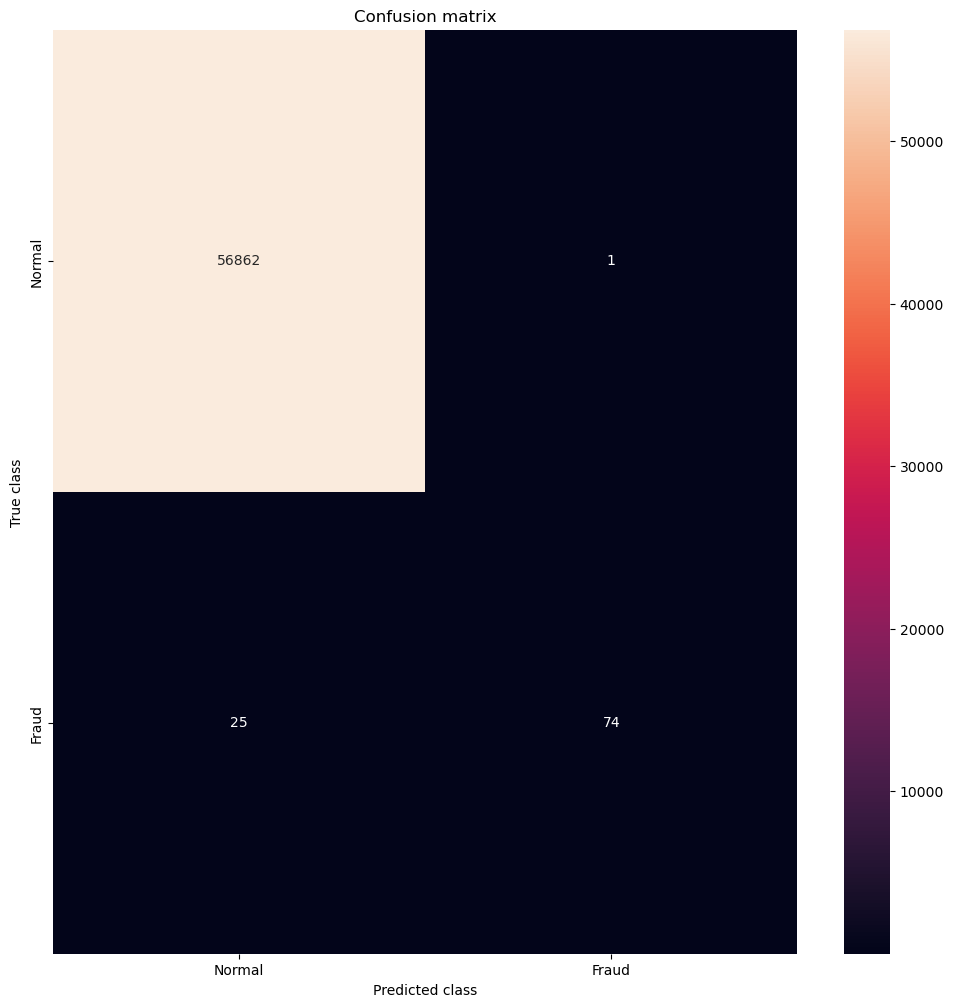

In [15]:
# This cell performs a key step: 📊 Data Visualization
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

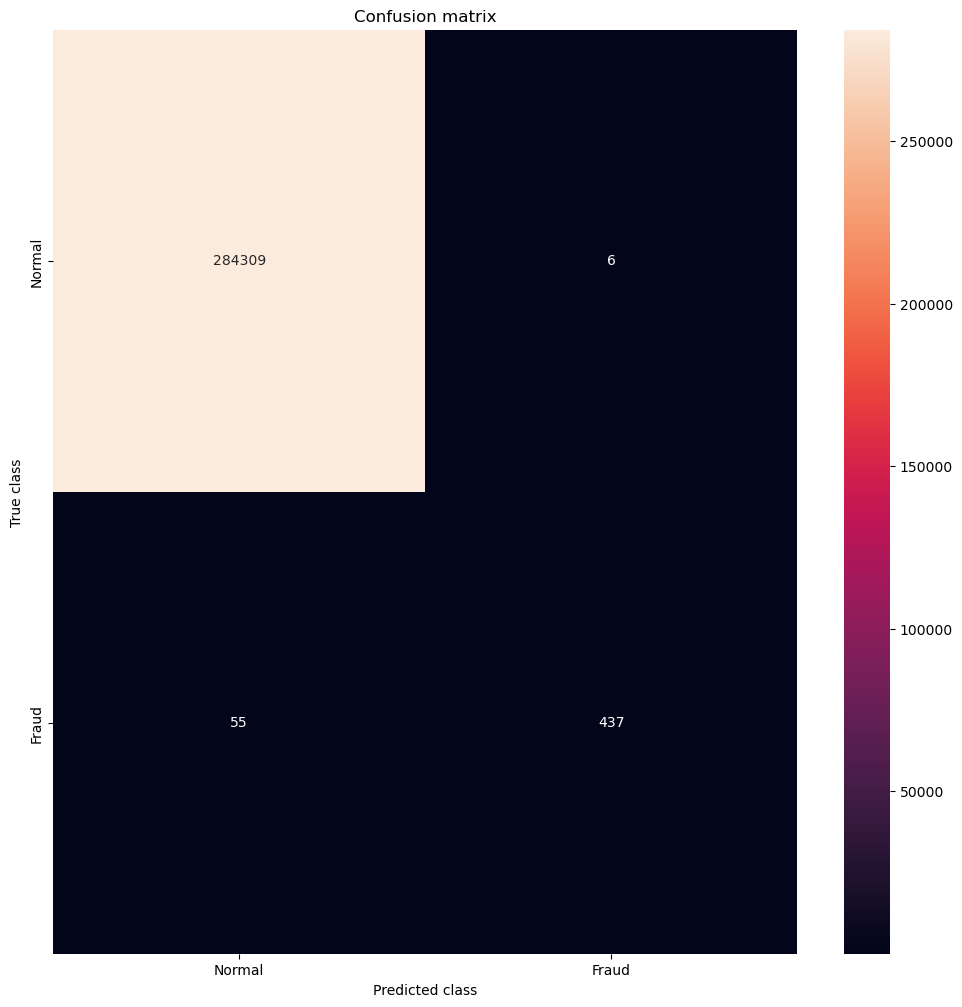

In [16]:
# This cell performs a key step: 📊 Data Visualization
y_pred = model.predict(x)


LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# This cell performs a key step: ⚙️ Data Preprocessing

valid_dedup = valid.drop_duplicates()
len(valid_dedup)

283253

In [ ]:
# This cell performs a key step: ⚙️ Data Preprocessing
df_combined = pd.concat([valid_dedup, fraud], axis=0)


df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)


In [23]:
# This cell performs a key step: ⚙️ Data Preprocessing
x = df_combined.drop('Class', axis=1) 
y = df_combined["Class"]

In [24]:
# This cell performs a key step: ⚙️ Data Preprocessing
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=42, stratify=y)

x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=0.50, random_state=42, stratify=y_)

In [ ]:
# This cell performs a key step: 🧠 Model Training
train_sizes = np.linspace(0.05, 1.0, 10)  
train_errors = []
cv_errors = []
model = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')

for size in train_sizes:
    train_size = int(size * len(x_train))
    x_train_subset = x_train.iloc[:train_size] 
    y_train_subset = y_train.iloc[:train_size]
    
    model.fit(x_train_subset, y_train_subset)


    y_train_pred = model.predict(x_train_subset)
    train_error = 1 - accuracy_score(y_train_subset, y_train_pred)


    y_val_pred = model.predict(x_val)
    cv_error = 1 - accuracy_score(y_val, y_val_pred)

    train_errors.append(train_error)
    cv_errors.append(cv_error)


# الرسم البياني


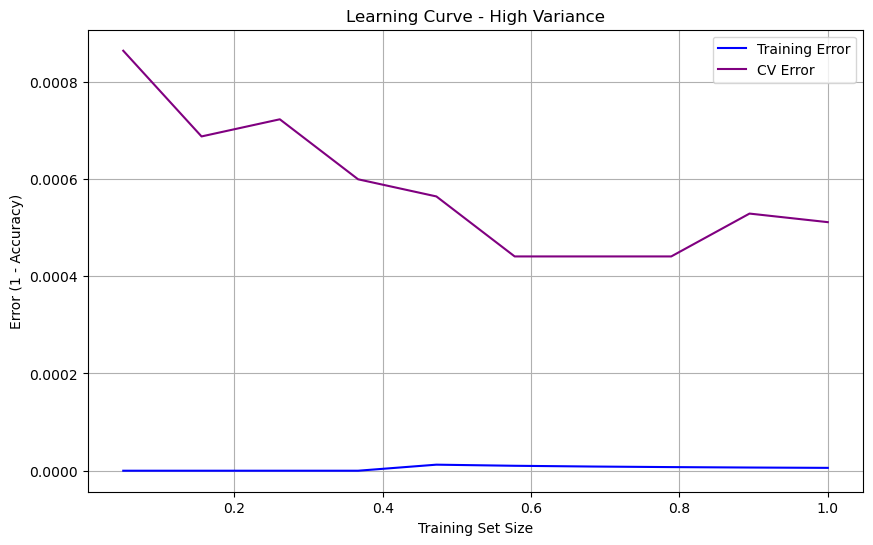

In [26]:
# This cell performs a key step: 📊 Data Visualization
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_errors, label='Training Error', color='blue')
plt.plot(train_sizes, cv_errors, label='CV Error', color='purple')
plt.title('Learning Curve - High Variance')
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# This cell performs a key step: 🧠 Model Training
y_test_pred = model.predict(x_test)
y_test_prob = model.predict_proba(x_test)[:, 1]

print("\nTest Evaluation:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test Recall (Sensitivity):", recall_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))


Test Evaluation:
Test Accuracy: 0.9995594636028828
Test F1 Score: 0.8618784530386742
Test Precision: 0.9397590361445783
Test Recall (Sensitivity): 0.7959183673469388
Test ROC AUC: 0.9472949123869421


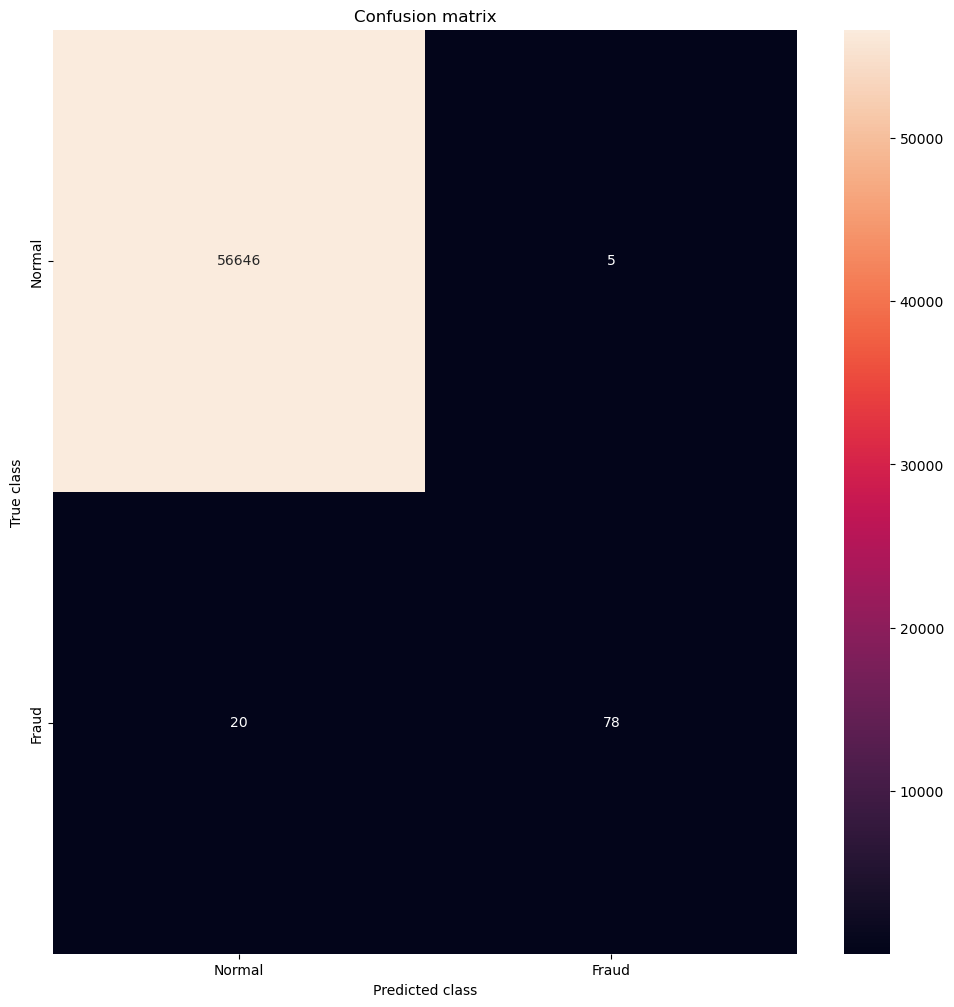

In [28]:
# This cell performs a key step: 📊 Data Visualization
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

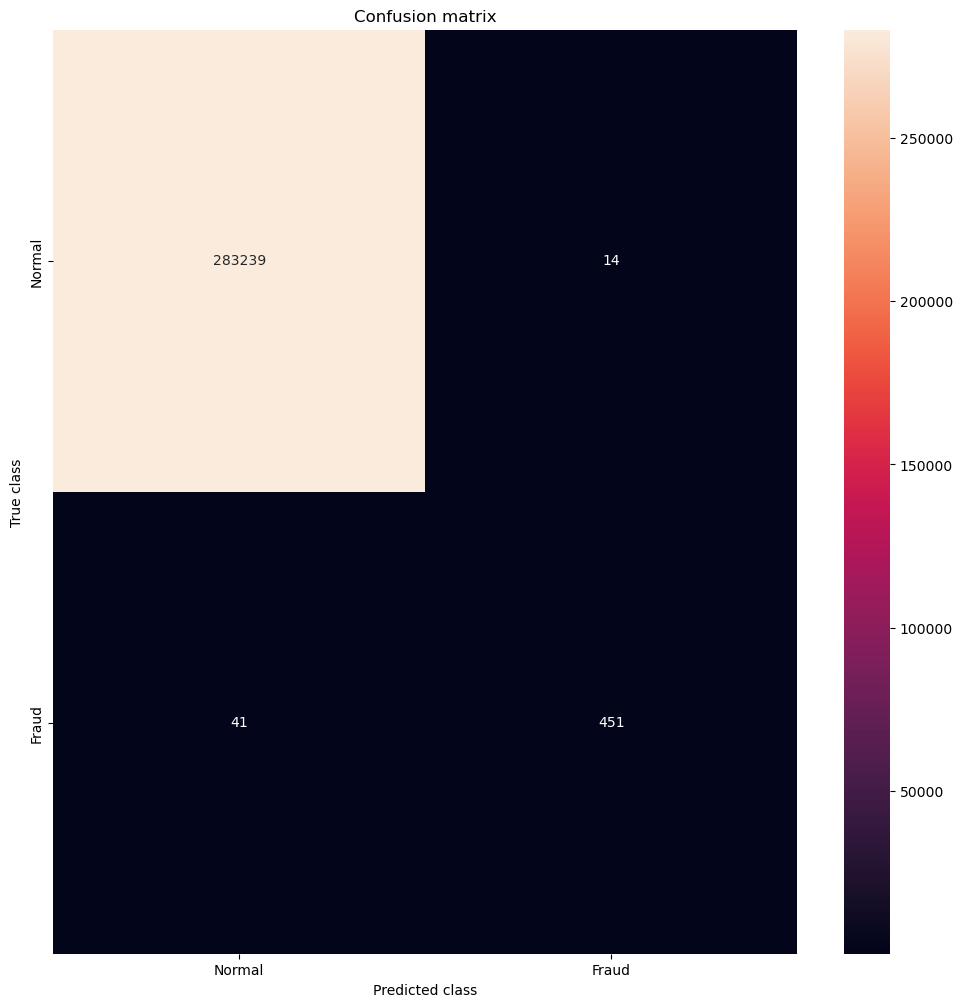

In [29]:
# This cell performs a key step: 📊 Data Visualization
y_pred = model.predict(x)


LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [30]:
valid_dedup = valid_dedup.sample(frac=0.75, random_state=42)
len(valid_dedup)

212440

In [ ]:
# This cell performs a key step: ⚙️ Data Preprocessing
df_combined = pd.concat([valid_dedup, fraud], axis=0)


df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

In [32]:
# This cell performs a key step: ⚙️ Data Preprocessing
x = df_combined.drop('Class', axis=1) 
y = df_combined["Class"]

In [33]:
len(x)

212932

In [34]:
# This cell performs a key step: ⚙️ Data Preprocessing
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=42, stratify=y)

x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=0.50, random_state=42, stratify=y_)

In [ ]:
# This cell performs a key step: 🧠 Model Training
train_sizes = np.linspace(0.05, 1.0, 10)  
train_errors = []
cv_errors = []
model = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')

for size in train_sizes:
    train_size = int(size * len(x_train))
    x_train_subset = x_train.iloc[:train_size] 
    y_train_subset = y_train.iloc[:train_size]
    
    model.fit(x_train_subset, y_train_subset)

    y_train_pred = model.predict(x_train_subset)
    train_error = 1 - accuracy_score(y_train_subset, y_train_pred)

    y_val_pred = model.predict(x_val)
    cv_error = 1 - accuracy_score(y_val, y_val_pred)

    train_errors.append(train_error)
    cv_errors.append(cv_error)




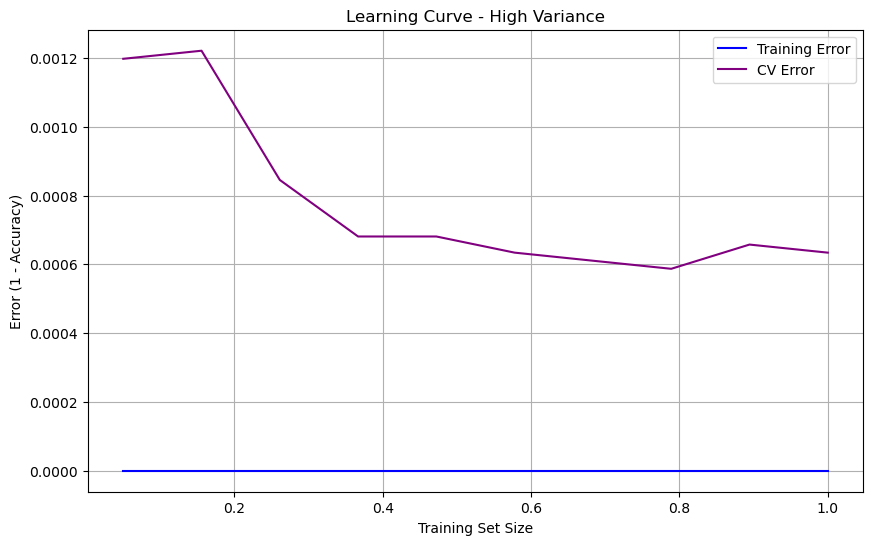

In [36]:
# This cell performs a key step: 📊 Data Visualization
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_errors, label='Training Error', color='blue')
plt.plot(train_sizes, cv_errors, label='CV Error', color='purple')
plt.title('Learning Curve - High Variance')
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - Accuracy)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
# This cell performs a key step: 🧠 Model Training
y_test_pred = model.predict(x_test)
y_test_prob = model.predict_proba(x_test)[:, 1]

print("\nTest Evaluation:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test Recall (Sensitivity):", recall_score(y_test, y_test_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))


Test Evaluation:
Test Accuracy: 0.9994599290863408
Test F1 Score: 0.8700564971751413
Test Precision: 0.9871794871794872
Test Recall (Sensitivity): 0.7777777777777778
Test ROC AUC: 0.9469870518401868


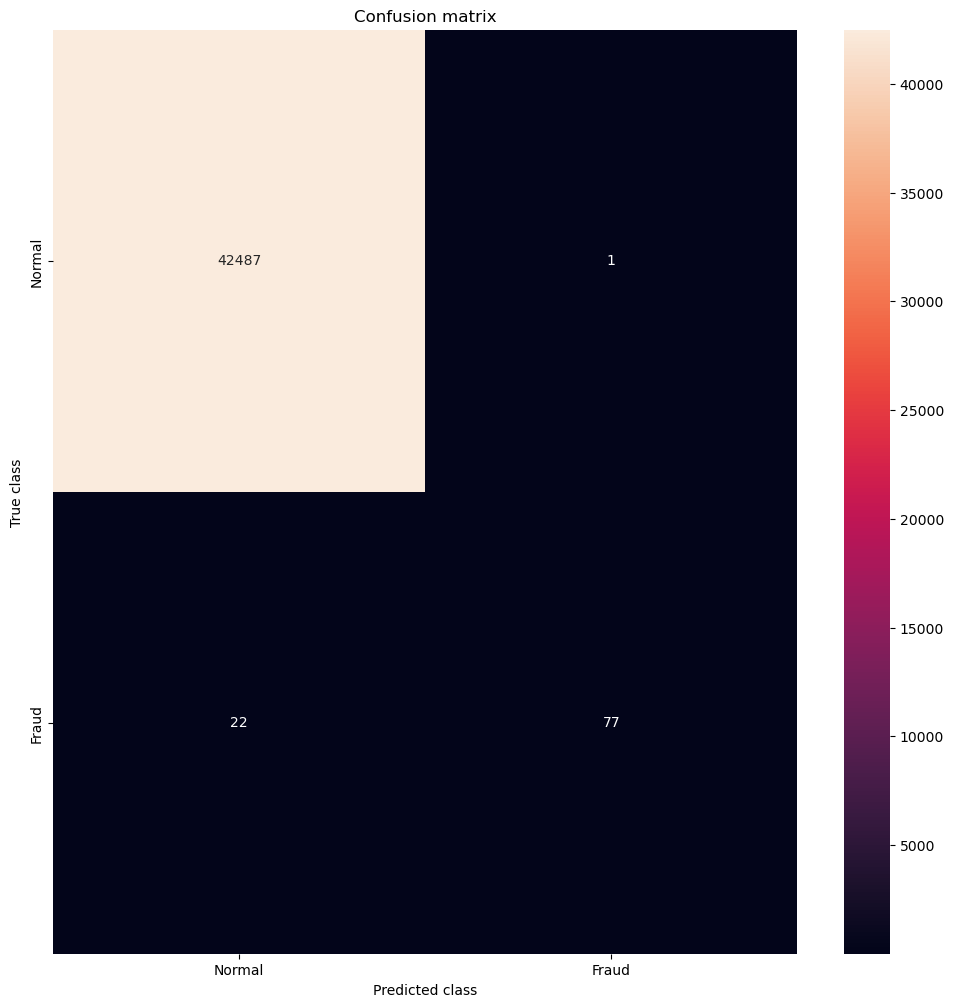

In [38]:
# This cell performs a key step: 📊 Data Visualization
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()